<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 9: Bias Varaince Throwdown </h2>

### Import Data and Support Functions

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pickle
import time
import supportFunctions
import importlib
importlib.reload(supportFunctions)

pickleFileName = 'data/fingerDataSet' + '.pickle'
with open(pickleFileName, 'rb') as pickleFile:
    data = pickle.load(pickleFile, encoding='bytes')

In [2]:
#Return to just using 3 images at training data:
trainingExampleIndices = [7, 30, 46]
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = supportFunctions.extractExamplesFromList(trainingExamples, whichImage = b'image1bit', dist = 4)

#And two for testing:
testingExampleIndices = [40, 41]
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = supportFunctions.extractExamplesFromList(testingExamples, whichImage = b'image1bit', dist = 4)

### Search For 1 pixel rules

In [23]:
rules = []
numErrors = []
startTime = time.time()

for i in range(81):
    yHat = (trainX[:,i] == 0)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, 0])

    yHat = (trainX[:,i] == 1)
    numErrors.append(sum(abs(yHat-trainY)))
    rules.append([i, 1])
    
timeElapsed = time.time()-startTime
print ('Time elapsed = ' + str(round(timeElapsed, 3)) + ' seconds.')

Time elapsed = 0.178 seconds.


In [43]:
#Find the winner:
min_value = np.argmin(np.array(numErrors))

Rule number 81 wins!

### Visualize Rule

In [7]:
#Make red and blue colormaps:
import matplotlib.colors as mcolors
c = mcolors.ColorConverter().to_rgb
bw = supportFunctions.make_colormap([(1,1,1), (1,1,1), 0.33, c('blue'), c('blue'), 0.66, c('blue')])
rw = supportFunctions.make_colormap([(1,1,1), (1,1,1), 0.33, c('red'), c('red'), 0.66, c('red')])
rwb = supportFunctions.make_colormap([c('red'), c('red'), 0.33, (1,1,1), (1,1,1), 0.66, c('blue')])

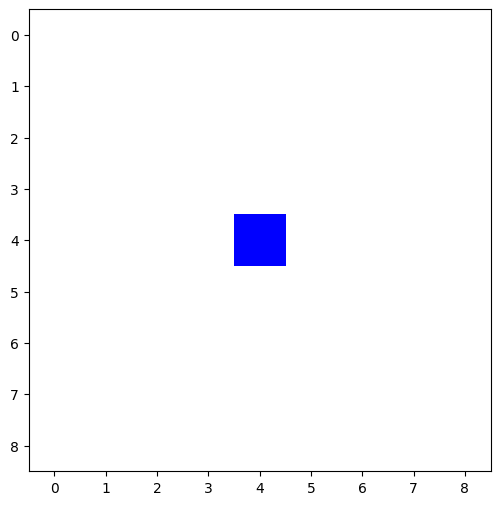

In [8]:
ruleVector = np.zeros(81)
ruleVector[40] = 1

fig = plt.figure(0, (6,6))
plt.imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = bw)

This rule classifies examples as fingers that have ones in the 40 position (shown above) - pretty cool!

## Now, let's test its performance!

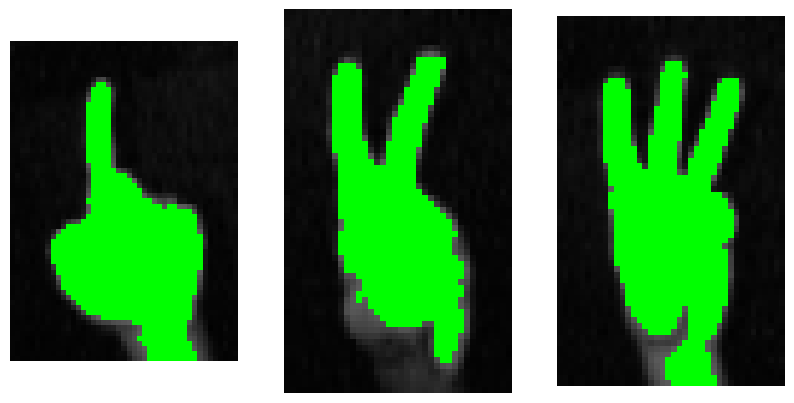

In [44]:
## First, visualize matches:
fig = plt.figure(0, (10, 8))

for i in range(3):
    fig.add_subplot(1,3,i+1)
    imageDict = data[trainingExampleIndices[i]]
    
    X1, y1 = supportFunctions.extractFeatures(imageDict, whichImage = b'image1bit', dist = 4)
    im = supportFunctions.makeGrayScale(imageDict)
    
    matchingIndices = (X1[:,40]==1)
    matchingImage = matchingIndices.reshape(imageDict[b'boxHeight'], imageDict[b'boxWidth'])
    
    #Paint with matches:
    im[:,:,0][matchingImage] = 0
    im[:,:,1][matchingImage] = 1
    im[:,:,2][matchingImage] = 0
    
    plt.imshow(im)
    plt.axis('off')

Thats alot of matches!

In [45]:
#Now, compute confustion matrix on training data:
matchingIndices = np.where(trainX[:,40]==1)

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(trainX.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(trainY==1, yHat==0))
FP =  np.sum(np.logical_and(trainY==0, yHat==1))
TP = np.sum(np.logical_and(trainY==1, yHat==1))
TN = np.sum(np.logical_and(trainY==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[ 479   16]
 [1798 5574]]


In [11]:
accuracy = float(TP+TN)/float(trainX.shape[0])
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (accuracy, recall, precision)

0.7694165501461803 0.9676767676767677 0.2103645147123408


## Now testing data! Will it generalize!?

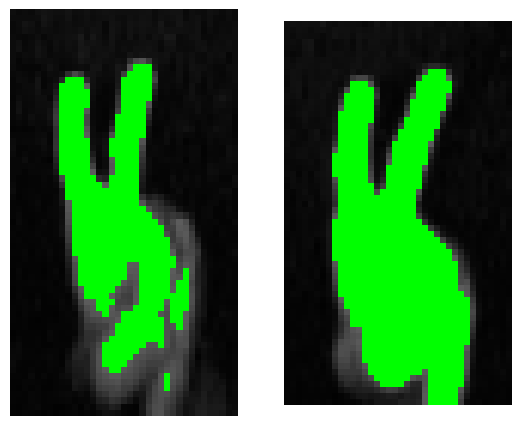

In [14]:
## First, visualize matches:
fig = plt.figure(0, (10, 8))

for i in range(2):
    fig.add_subplot(1,3,i+1)
    imageDict = data[testingExampleIndices[i]]
    
    X1, y1 = supportFunctions.extractFeatures(imageDict, whichImage = b'image1bit', dist = 4)
    im = supportFunctions.makeGrayScale(imageDict)
    
    matchingIndices = (X1[:,40]==1)
    matchingImage = matchingIndices.reshape(imageDict[b'boxHeight'], imageDict[b'boxWidth'])
    
    #Paint with matches:
    im[:,:,0][matchingImage] = 0
    im[:,:,1][matchingImage] = 1
    im[:,:,2][matchingImage] = 0
    
    plt.imshow(im, interpolation = 'none')
    plt.axis('off')

In [15]:
#Now, compute confustion matrix on training data:
matchingIndices = np.where(testX[:,40]==1)

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(testX.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(testY==1, yHat==0))
FP =  np.sum(np.logical_and(testY==0, yHat==1))
TP = np.sum(np.logical_and(testY==1, yHat==1))
TN = np.sum(np.logical_and(testY==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[ 327   14]
 [ 980 3553]]


In [16]:
accuracy = float(TP+TN)/float(testX.shape[0])
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (accuracy, recall, precision)

0.7960607304062371 0.9589442815249267 0.2501912777352716


Woohoo! Our method generalizes! We really made a hand detector, not a finger detector. But hopefully it's a step in the right direction. 